##Loading the MNIST dataset images. We do not load the labels. We want to reconstruct the images as output of the autoencoder.

---



In [1]:
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale


Using TensorFlow backend.


##Creating a training set and test set and normalizing the data to train the model better.

---


In [2]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [0]:
input_img= Input(shape=(784,))

To build the autoencoder we will have to first encode the input image and add different encoded and decoded layer to build the deep autoencoder as shown below.

![Texte alternatif…](https://cdn-images-1.medium.com/max/1600/1*EQU7F2dZ6p7_qiA_OS6qQg.png)

Deep Autoencoder

In [4]:
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
autoencoder=Model(input_img, decoded)

In [0]:
encoder = Model(input_img, encoded)

In [7]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total para

In [8]:
encoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [0]:
#encoder.predict()

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
autoencoder_train = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_data=(X_test, X_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.3272 - acc: 0.5005 - val_loss: 0.3019 - val_acc: 0.5037
Epoch 2/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2954 - acc: 0.5064 - val_loss: 0.2952 - val_acc: 0.5053
Epoch 3/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2893 - acc: 0.5072 - val_loss: 0.2914 - val_acc: 0.5044
Epoch 4/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.2855 - acc: 0.5076 - val_loss: 0.2861 - val_acc: 0.5055
Epoch 5/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.2829 - acc: 0.5079 - val_loss: 0.2838 - val_acc: 0.5058
Epoch 6/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.2810 - acc: 0.5080 - val_loss: 0.2826 - val_acc: 0.5060
Epoch 7/50
60000/60000 [==============================] - 4s 67us/step - loss: 0

##Encode & Decode  images

In [0]:
encoded_imgs = encoder.predict(X_test)
encoded_imgs.shape
predicted = autoencoder.predict(X_test)


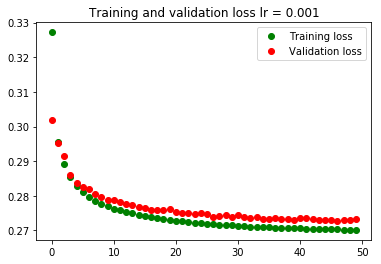

In [12]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss lr = 0.001')
plt.legend()
plt.show()

##APPLICATION DU T-SNE sur encoded data 

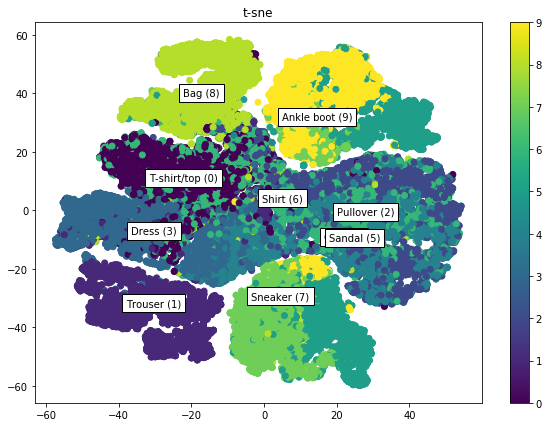

In [14]:

from sklearn.manifold import TSNE
reduced_train_data = encoder.predict(X_train)
reduced_test_data = encoder.predict(X_test)
coords = TSNE(n_components=2).fit_transform(reduced_train_data)
import matplotlib.pyplot as pltt

from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
labeldict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
fig, ax = pltt.subplots(figsize=(10, 7))
ax.set_title("t-sne")
classes = Y_train
pltt.scatter(coords[:, 0], coords[:, 1], c=classes)
pltt.colorbar()
for i in range(10):
  class_center = np.mean(coords[classes == i], axis=0)
  text = TextArea('{} ({})'.format(labeldict[i], i))
  ab = AnnotationBbox(text, class_center, xycoords='data', frameon=True)
  ax.add_artist(ab)
pltt.show()
 

## Other Lr 

In [0]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

autoencoder.compile(optimizer= sgd, loss='binary_crossentropy', metrics=['accuracy'])
autoencoder_train = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_data=(X_test, X_test))

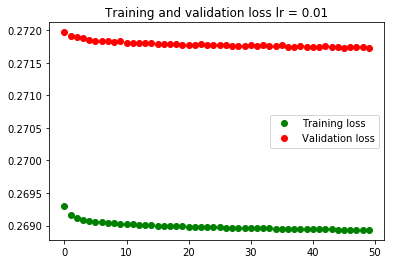

In [15]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss lr = 0.01')
plt.legend()
plt.show()

In [16]:
!pip install h5py

In [17]:
from google.colab import drive
drive.mount('/content/drive')

# serialize model to JSON
model_json = encoder.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
encoder.save_weights("model.h5")
print("Saved model to disk")
 
# later...

 
 # load json and create model
#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights("model.h5")
#print("Loaded model from disk")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
Saved model to disk


In [18]:
autoencoder.summary

<bound method Network.summary of <keras.engine.training.Model object at 0x7fcf4911de48>>

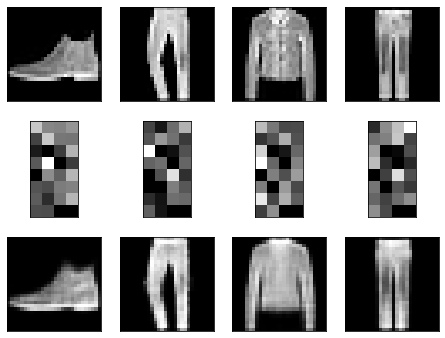

In [15]:
plt.figure(figsize=(40, 6))

for i in range(4):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i*5].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    
    plt.imshow(encoded_imgs[i*5].reshape(8,4))
  
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i*5].reshape(28, 28))

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    

plt.show()

##Kmeans 


 Applying kmeans over reduced data 

In [0]:
reduced_train_data = encoder.predict(X_train)
reduced_test_data = encoder.predict(X_test)


In [0]:
model2 = KMeans(init='k-means++', n_clusters=10, n_init=10)
clusters = model2.fit_predict(reduced_train_data)
centers = model2.cluster_centers_


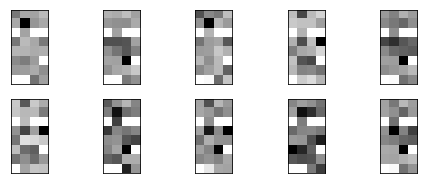

In [22]:

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = model2.cluster_centers_.reshape(10, 8, 4)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [0]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(Y_train[mask])[0]

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, labels)

0.53955

In [25]:
model3 = model2
clusters2 = model3.fit_predict(X_train)
centers2 = model3.cluster_centers_
centers2.shape

(10, 784)

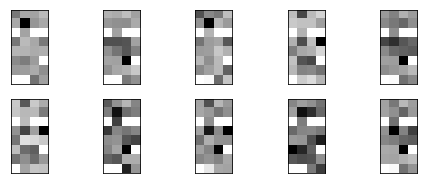

In [26]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers2 = model3.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [0]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters2 == i)
    labels[mask] = mode(Y_train[mask])[0]

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, labels)

0.5536666666666666

In [0]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [0]:
from sklearn.manifold import TSNE
reduced_train_data = encoder.predict(X_train)
reduced_test_data = encoder.predict(X_test)
coords = TSNE(n_components=2).fit_transform(reduced_train_data)
import matplotlib.pyplot as pltt

from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
labeldict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
fig, ax = pltt.subplots(figsize=(10, 7))
ax.set_title("t-sne")
classes = Y_train
pltt.scatter(coords[:, 0], coords[:, 1], c=classes)
pltt.colorbar()
for i in range(10):
  class_center = np.mean(coords[classes == i], axis=0)
  text = TextArea('{} ({})'.format(labeldict[i], i))
  ab = AnnotationBbox(text, class_center, xycoords='data', frameon=True)
  ax.add_artist(ab)
pltt.show()

 